In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Live.csv")
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
data = df.copy()

# Data info

In [4]:
pd.DataFrame({"Null data":df.isna().sum(),
             "Data types":df.dtypes,
             "Uniqe data":df.nunique(),}).T

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
Null data,0,0,0,0,0,0,0,0,0,0,0,0,7050,7050,7050,7050
Data types,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64
Uniqe data,6997,4,6913,1067,993,501,1044,229,65,42,24,14,0,0,0,0


# Dropping usless data

In [5]:
df.drop(columns=["status_id","status_published","Column1","Column2","Column3","Column4"] , axis=1,inplace=True)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


# convert object columns to category

In [6]:
df.status_type = df.status_type.astype("category")

# duplicated values

In [7]:
pd.DataFrame({"Duplecates":df.duplicated().sum()},index=[-1]).T

,-1
Duplecates,2063


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print(df.duplicated().sum())

0


# Data visulaization

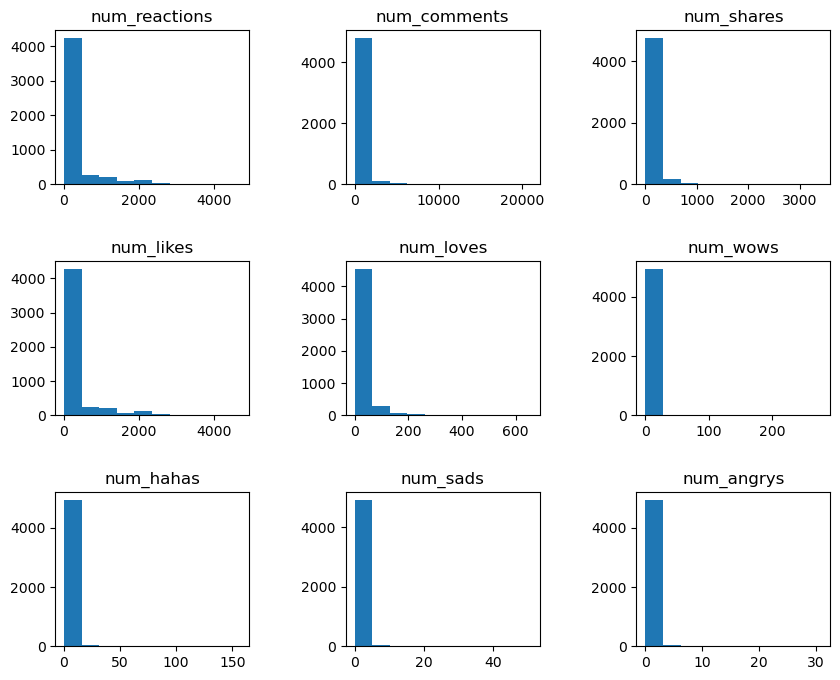

In [10]:
num_cols = df.select_dtypes("number").columns.tolist()
plt.figure(figsize=(10, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col])
    plt.title(f"{col}")
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

# Spliting data

In [11]:
from sklearn.model_selection import train_test_split

X_train , X_test = train_test_split(df , test_size=.1)

# Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()

cols_to_scale = df.select_dtypes("number").columns.tolist()

X_train[cols_to_scale] = x_scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = x_scaler.fit_transform(X_test[cols_to_scale])

# Encoding

In [13]:
X_train = pd.get_dummies(data=X_train , columns=["status_type"] , drop_first=True)
X_test = pd.get_dummies(data=X_test , columns=["status_type"] , drop_first=True)

# K-means model

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X_train)

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [15]:
cluster1 = X_train[model.predict(X_train) == 0].index.tolist()
cluster2 = X_train[model.predict(X_train) == 1].index.tolist()
cluster3 = X_train[model.predict(X_train) == 2].index.tolist()
cluster4 = X_train[model.predict(X_train) == 3].index.tolist()

In [16]:
data.loc[np.random.choice(cluster1, 6)]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1613,246675545449582_463321620451639,video,11/18/2013 2:28,813,6,0,813,0,0,0,0,0,NaN,NaN,NaN,NaN
6635,1050855161656896_1469978123077929,video,12/6/2017 9:57,228,4267,572,175,33,0,19,1,0,NaN,NaN,NaN,NaN
5733,614855718638584_680771848713637,video,12/20/2017 1:08,386,1912,394,246,137,1,2,0,0,NaN,NaN,NaN,NaN
42,246675545449582_1585003828283407,video,2/19/2018 0:11,236,181,21,201,33,0,1,0,1,NaN,NaN,NaN,NaN
1081,246675545449582_827591480691316,video,10/7/2015 1:18,2186,14,11,2186,0,0,0,0,0,NaN,NaN,NaN,NaN
4506,725980084255106_870692413117205,video,5/27/2018 6:24,1695,2279,677,1387,289,13,4,1,1,NaN,NaN,NaN,NaN


In [17]:
data.loc[np.random.choice(cluster2, 6)]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
563,246675545449582_1073569299426865,photo,10/16/2016 5:13,144,0,0,137,2,0,0,5,0,NaN,NaN,NaN,NaN
2072,246675545449582_284698388313964,photo,11/2/2012 11:09,42,8,0,42,0,0,0,0,0,NaN,NaN,NaN,NaN
3379,134115277150304_198409070720924,photo,11/27/2017 23:49,148,15,2,140,3,5,0,0,0,NaN,NaN,NaN,NaN
2271,246675545449582_267979753319161,photo,9/17/2012 8:40,87,28,0,87,0,0,0,0,0,NaN,NaN,NaN,NaN
6351,1050855161656896_1609265189149221,photo,4/27/2018 6:44,93,54,0,91,2,0,0,0,0,NaN,NaN,NaN,NaN
6421,1050855161656896_1571558206253253,photo,3/19/2018 21:24,45,0,0,42,1,2,0,0,0,NaN,NaN,NaN,NaN


In [18]:
data.loc[np.random.choice(cluster3, 6)]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
696,246675545449582_979183585532104,status,6/24/2016 9:28,150,2,1,146,4,0,0,0,0,NaN,NaN,NaN,NaN
1210,246675545449582_752017378248727,status,5/16/2015 9:52,421,16,0,421,0,0,0,0,0,NaN,NaN,NaN,NaN
4684,725980084255106_804004369786010,status,1/22/2018 10:01,1296,240,6,1274,13,9,0,0,0,NaN,NaN,NaN,NaN
6471,1050855161656896_1530969140312160,status,2/8/2018 3:20,69,1,0,68,1,0,0,0,0,NaN,NaN,NaN,NaN
2852,134115277150304_251122028782961,status,4/24/2018 8:17,65,9,0,65,0,0,0,0,0,NaN,NaN,NaN,NaN
7015,1050855161656896_1108606362548442,status,11/11/2016 20:46,63,0,1,62,1,0,0,0,0,NaN,NaN,NaN,NaN


In [19]:
data.loc[np.random.choice(cluster4, 6)]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6416,1050855161656896_1573917836017290,link,3/22/2018 6:51,9,4,0,9,0,0,0,0,0,NaN,NaN,NaN,NaN
6451,1050855161656896_1549129665162774,link,2/26/2018 12:37,1,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN
6528,1050855161656896_1504373476305060,link,1/12/2018 9:18,66,0,2,66,0,0,0,0,0,NaN,NaN,NaN,NaN
1287,246675545449582_694787343971731,link,1/23/2015 9:48,1212,7,1,1212,0,0,0,0,0,NaN,NaN,NaN,NaN
1137,246675545449582_792400577543740,link,8/2/2015 4:45,2214,1,0,2214,0,0,0,0,0,NaN,NaN,NaN,NaN
3309,134115277150304_206819623213202,link,12/19/2017 0:13,30,0,0,29,1,0,0,0,0,NaN,NaN,NaN,NaN


# Visulaization after prediction

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X = tsne.fit_transform(X_train)

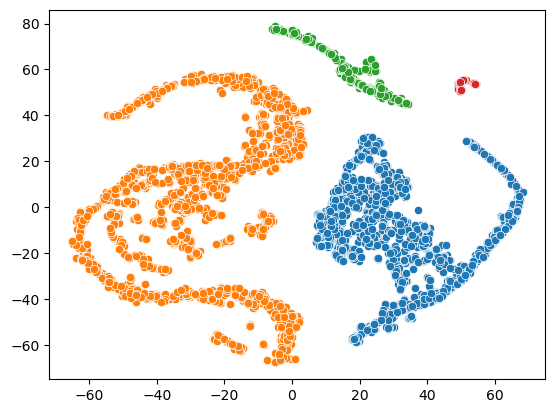

In [29]:
c1 = X[model.labels_ == 0]
c2 = X[model.labels_ == 1]
c3 = X[model.labels_ == 2]
c4 = X[model.labels_ == 3]

sns.scatterplot(x=c1[:, 0], y=c1[:, 1], markers="x")
sns.scatterplot(x=c2[:, 0], y=c2[:, 1], markers="o")
sns.scatterplot(x=c3[:, 0], y=c3[:, 1], markers="*")
sns.scatterplot(x=c4[:, 0], y=c4[:, 1], markers="+")
plt.show()

# Heirarchical clustering with k=9

In [32]:
from sklearn.cluster import AgglomerativeClustering
k = 4
model = AgglomerativeClustering(n_clusters=k)
model.fit(X_train)

AgglomerativeClustering(n_clusters=4)

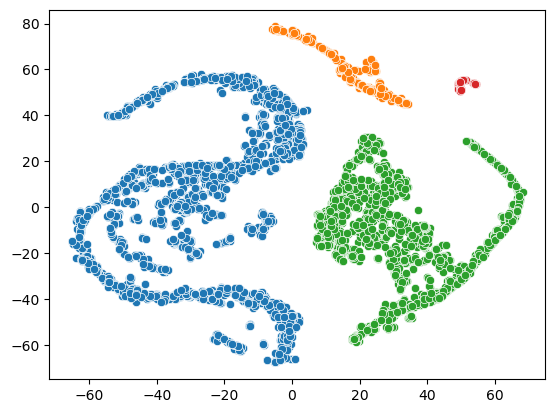

In [33]:
for i in range(k):
    c = X[model.labels_ == i]
    sns.scatterplot(x=c[:, 0], y=c[:, 1])
plt.show()